# Diagnostic Analysis on Missed Appointments with General Practitioners and Other NHS Healthcare Providers

# Activity 1

## GitHub repository
In case you haven't seen it yet, here's a link to our [GitHub repo](https://github.com/andreas-yiallouros/LSE_DA_Course_NHS_GP_Appointments)!

## Purpose of this diagnostic analysis project

First, thank you for taking the time and showing interest in our work. We are passionate about supporting the healthcare system in England and across the UK, so any feedback or suggestions you may have on our analysis (and of course any of your own analysis or built on ours) will be very welcome.\
\
The purpose of this notebook is to analyse the data on the UK public's appointments with General Practitioners (GPs) and other healthcare providers at the National Health Service (NHS) in England. We want to get closer to understanding enough about why patients may miss appointments, and through this understanding enable decision makers at the NHS and the UK government reach decisions that will reduce the number of missed apppointments.\
\
For more on the purpose of this project, please read the project's [README file](https://github.com/andreas-yiallouros/LSE_DA_Course_NHS_GP_Appointments/blob/main/README.md). 

# Activity 2

## Part 1 of 2: Get familiar with the metadata file

<span style="color:purple">**Note:**\
What follows between this point and the start of section **'Part 2 of 2: Import and expore the data'** is my notes getting familiar with the data sets and the metadata.\
Feel free to read, skim or skip ahead!

## 1. The data files at a high level
To begin with, we had the following data files:\
\
Data:
- *actual_duration.csv*
- *appointments_regional.csv* 
- *national_categories.xlsx*

Metadata:
- *metadata_nhs.txt* (covers all three data files)

These files were too large to add to our [GitHub repo](https://github.com/andreas-yiallouros/LSE_DA_Course_NHS_GP_Appointments). However, we can share them individually with anyone who may want to replicate or build on our analysis.\
\
It may be helpful to our readers to know upfront a bit on what the title of each file tells us about the data within.\
\
**actual_duration.csv** categorises appointments by *'geographic region'* and *'appointment date'*, but also by: 
* the *'appointments recorded duration'* (for example, 1-5 minutes, 6-10 minutes, etc.).

**appointments_regional.csv** categorises appointments by *'geographic region'* and *'appointment month'*, but also by: 
* *'status'* referring to whether the appointment was attended.
* *'healthcare professional type'* referring to whether the appointment was with a GP or other healthcare professional.
* *'mode'* referring to whether the appointment was face-to-face at the surgery; a remote consultation; a home visit; etc.
* *'amount of time between when the appointment was booked and the appointment'*.

**national_categories.xlsx** categorises appointments by *'geographic region'* and *'appointment date'*, but also by:
* *'setting'* referring to whether the appointment was with a GP in core hours, with a GP in extended hours, or healthcare professionals other than GPs.
* *'national category'* referring to the type of service provided (for example, consultation or clinical procedure).

Below, we expand much further on what is being measured by our data. 

## 2. The metadata file in detail, initial insights, and questions
*metadata_nhs.txt* tells us about: 
- the quality of the data we have for our project
- collectively what's in the three data files

### 2.1. A note on data quality
The most important point to note is that our data was collected from systems that were designed to help manage appointments. Our data therefore, is different compared to what it would have been had it been collected by systems designed to enable analysis to inform policy decisions.

### 2.2. Data fields highlighted in the metadata file, and specific data quality issues
At the start of our project, each of our three data files had been partially cleaned by for example removing columns that were considered irrelevant to our analysis.\
\
The data fields highlighted most prominently in the metadata file are:
1. Appointment Status
2. Healthcare Professional Type
3. Mode of Appointment
4. Time between Booking and Appointment

Below we consider what the metadata tells us about each of these four data fields. This is important because it will help us focus our initial analysis.

##### (1) Appointment Status (appointment_status)
The Appointment Status for each appointment changes over time moving from (1) 'Available' to (2) 'Booked' to (3) 'Attended' or 'Did Not Attend' or 'Cancelled'.

<span style="color:purple">**Question**\
Do cancelled appointments revert to 'available'?</span>

##### <span style="color:purple">Two data issues are noted in the metadata file
1. For between 3% and 6% of appointments the final status of the appointment remains 'Booked'. The status of these appointments in our dataset is reported as 'Unknown'.
2. Due to an issue with data collection, missed appointments are under-reported for the period from July 2018 until and including November 2018 (five months). ***Note:*** *We will use our analysis to evaluate the impact of this issue on the reliability of the missed appointments statistics.*

<span style="color:purple">**Question**\
Is there a typo in point#2? Our data actually starts from January 2020. July to November 2018 is not in our data.

<span style="color:purple">**Insight**\
If the appointments that continue showing as 'Booked' after the appointment time has lapsed are more likely to be in fact missed appointments, the missed appointments statistic will be understated. For example, if out of 100 appointments five are known to have been missed and three are shown as unknown, but in fact they have also been missed, the true rate of missed appointments would be 8% instead of the reported 5.2% (1 - 92/97).</span>

##### (2) Healthcare Professional (hcp_type)
The healthcare professional type data point for each appointment is based on what's recorded as the occupation of the NHS employee attending the appointment. Due to data extraction issues our data shows only the value 'GP' and 'Other Practice Staff'. We are told in the metadata that a small proportion of GP appointments (for example some of the appointments with Trainee GPs or GP Partners) may be misclassified as appointments with other practice staff.

<span style="color:purple">**Questions**
- <span style="color:purple">What is the definition of 'small' in 'small proportion of GP appointments'?
- <span style="color:purple">To what extent could this data issue impact the answer to our key questions about whether there has been adequate staff and capacity, and what was the utilisation of resources?</span>

##### (3) Mode of Appointment (appointment_mode)

<span style="color:purple">**Insights** 
- <span style="color:purple">The data on the mode of appointments (for example face-to-face, telephone, online, or home visits) is important because it could show us differences in the likelihood of appointments being missed depending on their mode. Knowing about such differences can inform decisions about reducing the rate of missed appointments.

- <span style="color:purple">Based on the metadata file there seem to be widespread data quality issues in how the mode of appointment is recorded.

<span style="color:purple">***Note:*** *We will consider the implications of these issues for the purposes of our analysis.*

##### (4) Time between Booking and Appointment (time_between_book_and_appointment)
The metadata file doesn't mention quality issues for the data about the time elapsed between when the booking was made and when the appointment happened.\
\
<span style="color:purple">**Insight**\
It may be helpful for the purposes of our project to consider the relationship between this data point and the data on missed appointments. For example are appointments more likely to be missed when the elapsed time between booking and the appointment is longer?</span>

### 2.3. What could the rest of the data fields tell us?
In this section, to further set the context for our data analysis, we consider what the metadata file tells us for the following data fields which are the the subject of the objectives for activity #2:
1. Service settings
2. Context types
3. National categories

#### (1) Service settings
<span style="color:purple">**Insight**\
The metadata for 'Service settings' seems more technical compared to that for the first four fields considered above. 

<span style="color:purple">**Insight**\
In my interpretation aided by Google searches for the terms ['GMS/PMS/APMS contracts'](https://www.bma.org.uk/advice-and-support/gp-practices/funding-and-contracts/gms-contract-and-pms-agreement-differences); ['Additional Roles Reimursement Scheme'](https://www.england.nhs.uk/gp/expanding-our-workforce/); and ['Extended Access Provision'](https://www.england.nhs.uk/statistics/statistical-work-areas/extended-access-general-practice/), a description of the four service settings could be:
- <span style="color:purple">**General Practice**: appointments delivering GP services in core contractual hours.
- <span style="color:purple">**Extended Access Provision**: appointments delivering GP services outside of core contractual hours, either in the early morning, evening or at weekends.
- <span style="color:purple">**Primary Care Network**: appointments delivering services by healthcare professionals other than GPs (for example 'clinical pharmacists', 'first contact physiotherapists', and 'health and wellbeing coaches')
- <span style="color:purple">**Other**: appointments delivering services at the GP surgery, but by other service providers. 

#### (2) Context types
'Context type' here refers to whether the appointment is an encounter with a patient or an activity which is part of patient care, but without the presence of the patient. I imagine an example of an activity which is part of patient care, but does not involve the presence of the patient might be the analysis of test results.\
\
The metadata suggest two 'Context types' plus an option to record the appointment as 'Unmapped' which would be used in case of an error in receiving the data or the data not captured.\
\
The two 'Context types' are:
- 'Care Related Encounter'
- 'Inconsistent Mapping'

'Care Related Encounter' seems self-explanatory - an appointment attended by a patient and a healthcare provider.\
\
'Inconsistent Mapping' as explained by the metadata file refers to a recorded appointment that did not involve the attendance of a patient. The use of the term 'inconsistent' shows that the notion of a patient appointment is contradictory with the notion that the patient is not in attendance.

#### (3) National categories
From the metadata this seems to relate to the reason why the patient needed the appointment. It includes 13 options, for example 'General Consultation Acute', 'General Consultation Routine', and 'Planned Clinical Procedure'.



<span style="color:purple"> **This is the end of my notes from getting familiar with the metadata file. If you skipped to here, that's fine! But please continue reading from the next cell!**

## Part 2 of 2: Import and expore the data

In [1]:
# Import the relevant libraries.
# Libraries selected based on the goals of the project and the data.
# See the markdown cells above for more details.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import *
import seaborn as sns
from bs4 import BeautifulSoup
import datetime
import warnings
warnings.filterwarnings('ignore')

### (1) Actual Duration of Appointments *(df_actual_duration)*

In [2]:
# Create a DataFrame for 'actual_duration.csv'.
# Choosing a longer more decriptive name for the DataFrame.
df_actual_duration = pd.read_csv('actual_duration.csv')

In [3]:
# See the first two rows.
df_actual_duration.head(2)

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619


In [4]:
# See the 'df_actual_duration' column names together with their data types.
# See the 'df_actual_duration' descriptive statistics.
df_actual_duration.info()
""".info() also tells us whether there are missing values"""
df_actual_duration.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


There seem to be no missing values given all Non-Null Count values are the same as the total number of rows in the DataFrame.

In [5]:
# Alternative method to check for missing values
df_actual_duration.dropna()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730
...,...,...,...,...,...,...,...,...
137788,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,31-60 Minutes,430
137789,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,21-30 Minutes,751
137790,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,16-20 Minutes,921
137791,X2C4Y,E38000254,NHS West Yorkshire ICB - X2C4Y,E54000054,E40000012,30-Jun-22,11-15 Minutes,1439


The .dropna() method returned the same number of rows (137,793) showing there are no missing values.

**Insights**
* 'df_actual_duration' includes eight columns and 137,793 rows.
* It seems to capture the count of appointments together with appointment dates and duration by location.
* From a Google search 'icb' may stand for 'Integrated Care Board' and 'ons' may stand for 'Office for National Statistics'.
* Seven columns have the data type 'object' and one ('count_of_appointments') has the data type 'integer'.
* We will consider changing the data type for 'appointment_date'.
* There seem to be no missing values.
* We will investigate the possible presence of 'count_of_appointments' outliers, given the min value of 1 and the max value of 15,400 compared to the mean (1,219) and standard deviation (1,547).


### (2) Regional Appointments *(df_appointments_regional)*

In [6]:
# Create a DataFrame for 'appointments_regional.csv'.
# Choosing a longer more decriptive name for the DataFrame.
df_appointments_regional = pd.read_csv('appointments_regional.csv')

In [7]:
# See the first ten rows.
df_appointments_regional.head(10)

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
5,E54000034,2020-01,Attended,GP,Face-to-Face,More than 28 Days,3273
6,E54000034,2020-01,Attended,GP,Face-to-Face,Same Day,64649
7,E54000034,2020-01,Attended,GP,Home Visit,1 Day,151
8,E54000034,2020-01,Attended,GP,Home Visit,15 to 21 Days,12
9,E54000034,2020-01,Attended,GP,Home Visit,2 to 7 Days,141


In [8]:
# See the 'df_appointments_regional' column names together with their data types.
# See the 'df_appointments_regional' descriptive statistics.
df_appointments_regional.info()
""".info() also tells us whether there are missing values"""
df_appointments_regional.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


There seem to be no missing values given all Non-Null Count values are the same as the total number of rows in the DataFrame.

In [9]:
# Alternative method to check for missing values
df_appointments_regional.dropna()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17


The .dropna() method returned the same number of rows (596,821) showing there are no missing values.

In [10]:
# Answer to how many appointment statuses are represented in the data.
count_apt_status = df_appointments_regional['appointment_status'].nunique()
print("Count of appointment statuses: ", count_apt_status)

Count of appointment statuses:  3


In [11]:
# Answer to what are the names of the three appointment statuses.
pd.unique(df_appointments_regional['appointment_status']).tolist()

['Attended', 'DNA', 'Unknown']

In [12]:
# Answer to how what is the count_of_appointments per appointment status.
df_apt_count_by_status_norm = (
    df_appointments_regional.appointment_status.value_counts(normalize=True))
df_apt_count_by_status_norm

Attended    0.388956
Unknown     0.337327
DNA         0.273717
Name: appointment_status, dtype: float64

In [13]:
# Unique values in 'hcp_type'.
pd.unique(df_appointments_regional['hcp_type']).tolist()

['GP', 'Other Practice staff', 'Unknown']

In [14]:
# Unique values in 'appointment_mode'.
pd.unique(df_appointments_regional['appointment_mode']).tolist()

['Face-to-Face', 'Home Visit', 'Telephone', 'Unknown', 'Video/Online']

**Insights**
* 'df_appointments_regional' has seven columns and 596,821 rows.
* It seems to capture six data points by location (based on the 'icb_ons_code'): (1) the count_of_appointments together with (2) appointment_month, (3) status, (4) mode, (5) hcp ('healthcare professional type'), and (6) time_between_book_and_appointment.
* Six columns have data type 'object' and one ('count_of_appointments') has data type 'integer'.
* We will consider changing the data type for 'appointment_month' and 'time_between_book_and_appointment'.
* There seem to be no missing values.
* We will investigate the possible presence of 'count_of_appointments' outliers, given the min value of 1 and the max value of 211,265 compared to the mean (1,245) and standard deviation (5,857).
* The status of 34% of appointments shows as 'Unknown' and for 27% it is shown as 'DNA' ('did not attend'). Both of these are higher than expected indicating possible data quality issues beyond those described in the metadata file. 

### (3) National Categories *(df_national_categories)*

In [15]:
# Create a DataFrame for 'national_categories.xlsx'.
df_national_categories = pd.read_excel('national_categories.xlsx')

In [16]:
# See the first ten rows.
df_national_categories.head(10)

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
5,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Care Home Visit,11,2021-08
6,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Unmapped,Unmapped,Unmapped,372,2021-08
7,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Home Visit,4,2021-08
8,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Clinical Triage,98,2021-08
9,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,General Consultation Acute,35,2021-08


In [17]:
# See the 'df_national_categories' column names together with their data types.
# See the 'df_national_categories' descriptive statistics.
df_national_categories.info()
""".info() also tells us whether there are missing values"""
df_national_categories.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


,count_of_appointments
count,817394.000000
mean,362.183684
std,1084.576600
min,1.000000
25%,7.000000
50%,25.000000
75%,128.000000
max,16590.000000


There seem to be no missing values given all Non-Null Count values are the same as the total number of rows in the DataFrame.

In [18]:
# Alternative method to check for missing values
df_national_categories.dropna()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
...,...,...,...,...,...,...,...,...
817389,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06
817390,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06
817391,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06


The .dropna() method returned the same number of rows (817,394) showing there are no missing values.

**Insights**
* 'df_national_categories' has eight columns and 817,394 rows.
* It seems to capture six data points by location (based on the 'sub_icb_location_name'): (1) the count of appointments together with (2) appointment date; (3) appointment_month, (4) service_setting, (5) context_type, and (6) national_category.
* Seven columns have data type 'object' and one ('count_of_appointments') has data type 'integer'.
* We will consider changing the data type for 'appointment_month' and 'appointment_date'.
* There seem to be no missing values.
* We will investigate the possible presence of 'count_of_appointments' outliers, given the min value of 1 and the max value of 16,590 compared to the mean (362) and standard deviation (1,084).

**Question 1**\
How many locations are there in the data set?

**Answer:**\
The answer depends on at which level we define 'location'.\
At the sub-ICB level there are 106 locations.\
At the ICB level there are 42 locations.\
At the region level there are 7 locations.

**Approach**

**Number of locations at sub-ICB level**

In [19]:
# Number of locations at the sub-ICB level represented in df_national_categories.
count_locations = df_national_categories['sub_icb_location_name'].nunique()
print("Count of locations: ", count_locations)

Count of locations:  106


In [20]:
# Check whether the number of locations represented by 'sub_icb_location_name'
# in 'df_national_categories'is the same as the number of locations 
# in 'df_actual_duration'.
count_locations_ad = df_actual_duration['sub_icb_location_name'].nunique()
print("Count of locations: ", count_locations_ad)
print("Count of locations in df_ad equals Count of locations in df_nc: ",
     count_locations == count_locations_ad)

Count of locations:  106
Count of locations in df_ad equals Count of locations in df_nc:  True


In [21]:
# See how many locations are represented in 'df_actual_duration.sub_icb_location_ons_code'.
count_sub_icb_locations_ons = df_actual_duration['sub_icb_location_ons_code'].nunique()
print("Count of sub_icb locations based on ons: ", count_sub_icb_locations_ons)

Count of sub_icb locations based on ons:  106


**Number of locations at ICB level**

In [22]:
# See how many locations are represented in for 'df_actual_duration.icb_ons_code'.
count_icb_ons_ad = df_actual_duration['icb_ons_code'].nunique()
print("Count of icb locations based on ons in 'df_actual_duration': ", count_icb_ons_ad)

Count of icb locations based on ons in 'df_actual_duration':  42


In [23]:
# See how many locations are represented in 'df_appointments_regional.icb_ons_code'.
count_icb_ons_ra = df_appointments_regional['icb_ons_code'].nunique()
print("Count of icb locations based on ons in 'df_appointments_regional': ", count_icb_ons_ra)

Count of icb locations based on ons in 'df_appointments_regional':  42


In [24]:
# See how many locations are represented in 'df_national_categories.icb_ons_code'.
count_icb_ons_nc = df_national_categories['icb_ons_code'].nunique()
print("Count of icb locations based on ons in 'df_national_categories': ", count_icb_ons_nc)

Count of icb locations based on ons in 'df_national_categories':  42


**Number of locations at region level**

In [25]:
# See how many regions are represented in 'df_actual_duration.region_ons_code'.
count_region_ons_ad = df_actual_duration['region_ons_code'].nunique()
print("Count of regions based on ons in 'df_actual_duration': ", count_region_ons_ad)

Count of regions based on ons in 'df_actual_duration':  7


**Question 2**\
What are the five locations with the highest number of records?

**Answer**\
This table shows the five locations with the highest number of records in descending order.


| Location | Records Absolute Terms | Records % of Total |
| ---- | ---- | ---- |
| North West London | 13,007 | 1.6% |
| ---- | ---- | ---- |
| Kent and Medway | 12,637 | 1.5% |
| ---- | ---- | ---- |
| Devon | 12,526 | 1.5% |
| ---- | ---- | ---- |
| Hampshire and Isle of Wight | 12,171 | 1.5% |
| ---- | ---- | ---- |
| North East London | 11,837 | 1.4% |

**Approach**

In [26]:
# Five locations with the highest number of records.
df_locations = df_national_categories.sub_icb_location_name.value_counts().reset_index()
df_locations.head()

,index,sub_icb_location_name
0,NHS North West London ICB - W2U3Z,13007
1,NHS Kent and Medway ICB - 91Q,12637
2,NHS Devon ICB - 15N,12526
3,NHS Hampshire and Isle Of Wight ICB - D9Y0V,12171
4,NHS North East London ICB - A3A8R,11837


In [27]:
# Five locations with the highest number of records in percentage terms.
df_locations_norm = (
    df_national_categories.sub_icb_location_name.value_counts(normalize=True)).reset_index()
df_locations_norm.head()

,index,sub_icb_location_name
0,NHS North West London ICB - W2U3Z,0.015913
1,NHS Kent and Medway ICB - 91Q,0.015460
2,NHS Devon ICB - 15N,0.015324
3,NHS Hampshire and Isle Of Wight ICB - D9Y0V,0.014890
4,NHS North East London ICB - A3A8R,0.014481


**Question 3**\
How many (1) service settings, (2) context types, (3) national categories, and (4) appointment statuses are there?

**Answer**

| Name of variable | How many categories |
| ---- | ---- |
| Service settings | 5 |
| ---- | ---- |
| Context types | 3 |
| ---- | ---- |
| National categories | 18 |
| ---- | ---- |
| Appointment statuses | 3 |
| ---- | ---- |


**Approach**

**Service settings**

In [28]:
# How many service settings are represented in the data.
count_service_settings = df_national_categories['service_setting'].nunique()
print("Count of service settings: ", count_service_settings)

Count of service settings:  5


Below we explore slightly beyond the initial question to see in percentage terms the volume of records per service setting.

In [29]:
# Number of records by sevice setting in percentage terms.
df_service_setting_norm = (
    df_national_categories.service_setting.value_counts(normalize=True)).reset_index()
df_service_setting_norm

,index,service_setting
0,General Practice,0.439536
1,Primary Care Network,0.224849
2,Other,0.169794
3,Extended Access Provision,0.132276
4,Unmapped,0.033544


**Context types**

In [30]:
# How many context types are represented in the data.
count_context_types = df_national_categories['context_type'].nunique()
print("Count of context types: ", count_context_types)

Count of context types:  3


Below we explore slightly beyond the initial question to see in percentage terms the volume of records per context type.

In [31]:
# Number of records by context type in percentage terms.
df_context_type_norm = (
    df_national_categories.context_type.value_counts(normalize=True)).reset_index()
df_context_type_norm

,index,context_type
0,Care Related Encounter,0.856969
1,Inconsistent Mapping,0.109487
2,Unmapped,0.033544


**National categories**

In [32]:
# How many national categories are represented in the data.
count_national_categories = df_national_categories['national_category'].nunique()
print("Count of national categories: ", count_national_categories)

Count of national categories:  18


Below we explore slightly beyond the initial question to see in percentage terms the volume of records per national category.

In [33]:
# Number of records by national category in percentage terms for the top ten.
df_nat_cat_norm = (
    df_national_categories.national_category.value_counts(normalize=True)).reset_index()
df_nat_cat_norm.head(10)

,index,national_category
0,Inconsistent Mapping,0.109487
1,General Consultation Routine,0.109285
2,General Consultation Acute,0.103835
3,Planned Clinics,0.093503
4,Clinical Triage,0.091191
5,Planned Clinical Procedure,0.072953
6,Structured Medication Review,0.054401
7,Service provided by organisation external to t...,0.052722
8,Home Visit,0.051199
9,Unplanned Clinical Activity,0.049444


**Appointment statuses**

In [34]:
# Unique values in 'context_type'.
pd.unique(df_national_categories['context_type']).tolist()

['Care Related Encounter', 'Unmapped', 'Inconsistent Mapping']

### <span style="color:purple">Other questions before we move on to Activity 3
The following may help gain a deeper understanding of the data before we move on to Activity 3:
1. Is the number of locations at sub-icb level as shown by 'sub_icb_location_name' and 'sub_icb_location_code' the same in 'df_actual_duration' as it is in 'df_national_categories'?
2. Are the locations repreented by the 'icb_ons_code' data consistent across the three DataFrames? 
3. Why could we not have the 'sub_icb_location' breakdown in 'df_regional_appointments'?
4. Is the count of appointments consistent across the three DataFrames?

### <span style="color:purple">Appointments

**Actual duration categories**

In [35]:
# What are the 'actual_duration' categories.
pd.unique(df_actual_duration['actual_duration']).tolist()

['31-60 Minutes',
 '21-30 Minutes',
 '6-10 Minutes',
 'Unknown / Data Quality',
 '16-20 Minutes',
 '11-15 Minutes',
 '1-5 Minutes']

**Categories for time between booking and appointment**

In [36]:
# What are the 'time_between_book_and_appointment' categories.
pd.unique(df_appointments_regional['time_between_book_and_appointment']).tolist()

['1 Day',
 '15  to 21 Days',
 '2 to 7 Days',
 '22  to 28 Days',
 '8  to 14 Days',
 'More than 28 Days',
 'Same Day',
 'Unknown / Data Quality']

**Total number of appointments in df_actual_duration**

In [37]:
# Calculate the sum of appointments in 'df_actual_duration'
np.sum(df_actual_duration['count_of_appointments'])

167980692

**Total number of appointments in df_appointments_regional**

In [38]:
# Calculate the sum of appointments in 'df_appointments_regional'
np.sum(df_appointments_regional['count_of_appointments'])

742804525

**Total number of appointments in df_national_categories**

In [39]:
# Calculate the sum of appointments in 'df_national_categories'
np.sum(df_national_categories['count_of_appointments'])

296046770

**<span style="color:purple">Insight**\
Given the results of activity 3 below, the difference in the total number of appointments across the three data sets might be explained by the difference in the time periods represented in each:

| DataFrame           | Time period         | Total number of appointments |
| ---------------------------- | ---------------------------- | ---------------------------- |
| df_actual_duration  | Dec 2021 - Jun 2022 (seven months) | 168 million                  |
| ---------------------------- | ---------------------------- | ---------------------------- |
| df_appointments_regional | Jan 2020 - Jun 2022 (thirty months) | 743 million |
| ---------------------------- | ---------------------------- | ---------------------------- |
| df_national categories | Aug 2021 - June 2022 (eleven months) | 296 million |
| ---------------------------- | ---------------------------- | ---------------------------- |

# Activity 3

### Continue to explore the data and search for answers to more specific questions posed by the NHS

**Question 1**\
Between what dates were appointments scheduled?

**Answer**\
In 'df_actual_duration' we can see appointment dates are between 1 December 2021 and 30 June 2022 (seven months).\
\
In 'df_national_categories' we can see appointment dates are between 1 August 2021 and 30 June 2022 (eleven months).\
\
The third DataFrame, 'df_appointments_regional', includes an 'appointment_month' Series but not 'appointment_date'.\
Based on 'appointment_month' in df_appointments_regional', we see appointments between January 2020 and June 2022 (30 months).


**Approach**\
A column named 'appointment_date' is in 'df_actual_duration' and in 'df_national_categories'.\
We'll check the data type of the 'appointment_date' column in both DataFrames, and we'll change it to *datetime* if it's not already that.\
Then we'll check the first and last date in each of the two DataFrames to see whether they cover the same period.

###### 'appointment_date' in 'df_actual_duration'

In [40]:
# View the first and last five rows of 'appointment_date'
# for 'df_actual_duration' to determine the date format.
df_actual_duration['appointment_date']

0         01-Dec-21
1         01-Dec-21
2         01-Dec-21
3         01-Dec-21
4         01-Dec-21
            ...    
137788    30-Jun-22
137789    30-Jun-22
137790    30-Jun-22
137791    30-Jun-22
137792    30-Jun-22
Name: appointment_date, Length: 137793, dtype: object

**Comment**\
The data type is *object* (i.e., *string*), and it looks like the time period is from 1 Dec 2021 to 30 June 2022.\
First, I'll change the data type to *datetime*.\
Then I'll check if that's indeed the time period with the min() and max() functions.

In [41]:
# Change the data type of 'appointment_date' in 'df_actual_duration'
# to datetime
df_actual_duration.appointment_date = pd.to_datetime(df_actual_duration.appointment_date)

In [42]:
# Check the data type now shows as datetime - dtypes method.
df_actual_duration.dtypes

sub_icb_location_code                object
sub_icb_location_ons_code            object
sub_icb_location_name                object
icb_ons_code                         object
region_ons_code                      object
appointment_date             datetime64[ns]
actual_duration                      object
count_of_appointments                 int64
dtype: object

In [43]:
# Check the data type now shows as datetime - head() method.
df_actual_duration.appointment_date.head(3)

0   2021-12-01
1   2021-12-01
2   2021-12-01
Name: appointment_date, dtype: datetime64[ns]

In [44]:
# View the earliest date in df_actual_duration.appointment_date
df_actual_duration.appointment_date.min()

Timestamp('2021-12-01 00:00:00')

In [45]:
# View the latest date in df_actual_duration.appointment_date
df_actual_duration.appointment_date.max()

Timestamp('2022-06-30 00:00:00')

**Result**\
We changed the data type for 'df_actual_duration.appointment_date' from 'string' to 'datetime' and we established the time period of our data in this DataFrame is 1 Dec 2021 to 30 June 2022 - that is seven months.

###### 'appointment_date' and 'appointment_month' in df_national_categories

In [46]:
# View the first five and last five rows of 'appointment_date'
# for 'df_national_categories' to determine the date format.
df_national_categories['appointment_date']

0        2021-08-02
1        2021-08-02
2        2021-08-02
3        2021-08-02
4        2021-08-02
            ...    
817389   2022-06-30
817390   2022-06-30
817391   2022-06-30
817392   2022-06-30
817393   2022-06-30
Name: appointment_date, Length: 817394, dtype: datetime64[ns]

**Comment**\
The data type is *object* (i.e., *string*), and it looks like the time period is from 2 Aug 2021 to 30 June 2022.\
I'll change the data type to *datetime*.\
Then I'll check if that's indeed the time period with the min() and max() functions.

In [47]:
# Change the data type of 'appointment_date' in 'df_national_categories'
# to datetime
df_national_categories.appointment_date = pd.to_datetime(df_national_categories.appointment_date)

In [48]:
# Check the data type now shows as datetime - dtypes method
df_national_categories.dtypes

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object

In [49]:
# Check the data type now shows as datetime - head() method
df_national_categories.appointment_date.head(3)

0   2021-08-02
1   2021-08-02
2   2021-08-02
Name: appointment_date, dtype: datetime64[ns]

In [50]:
# See the earliest appointment_date in the Series.
df_national_categories['appointment_date'].min()

Timestamp('2021-08-01 00:00:00')

In [51]:
# See the latest appointment_date in the Series.
df_national_categories['appointment_date'].max()

Timestamp('2022-06-30 00:00:00')

**Result**\
We changed the data type for 'df_national_categories' from 'string' to 'datetime' and we established the time period of our data in this DataFrame is 1 Aug 2021 to 30 June 2022 - that is eleven months.

###### 'appointment_month' in df_appointments_regional

Out of curiosity and for completeness, let's see the range of appointment months in df_appointments_regional.

In [52]:
# Change the data type of 'appointment_month' in 'df_appointments_regional'.
# to datetime
df_appointments_regional.appointment_month = pd.to_datetime(df_appointments_regional.appointment_month)

In [53]:
# Check the data type now shows as datetime - head() method.
df_appointments_regional.appointment_month.head(3)

0   2020-01-01
1   2020-01-01
2   2020-01-01
Name: appointment_month, dtype: datetime64[ns]

In [54]:
# Check the data type now shows as datetime - dtypes() method.
df_appointments_regional.dtypes

icb_ons_code                                 object
appointment_month                    datetime64[ns]
appointment_status                           object
hcp_type                                     object
appointment_mode                             object
time_between_book_and_appointment            object
count_of_appointments                         int64
dtype: object

In [55]:
# Earliest month.
df_appointments_regional.appointment_month.min()

Timestamp('2020-01-01 00:00:00')

In [56]:
# Latest month.
df_appointments_regional.appointment_month.max()

Timestamp('2022-06-01 00:00:00')

**Period covered by df_appointments_regional**\
df_appointments_regional covers the period from January 2020 to June 2022 (30 months).

**'appointment_month' in df_national_categories**\
For consistency so that all our data that should be in datetime format is formatted correctly, I'll also change to datetime the data type of 'appointment_month' in df_national_categories.

In [57]:
# Change to datetime the data type of 'appointment_month' in 'df_national_categories'.
df_national_categories.appointment_month = pd.to_datetime(df_national_categories.appointment_month)

In [58]:
# Earliest month.
df_national_categories.appointment_month.min()

Timestamp('2021-08-01 00:00:00')

In [59]:
# Latest month.
df_national_categories.appointment_month.max()

Timestamp('2022-06-01 00:00:00')

**** End of approach to question 1 ****

**Question 2**\
Which service setting reported the most appointments in North West London from 1 January to 1 June 2022?\
\
Note:\
From Activity 2 we know there could be four service settings:
- **General Practice**: appointments delivering GP services in core contractual hours.
- **Extended Access Provision**: appointments delivering GP services outside of core contractual hours, either in the early morning, evening or at weekends.
- **Primary Care Network**: appointments delivering services by healthcare professionals other than GPs (for example 'clinical pharmacists', 'first contact physiotherapists', and 'health and wellbeing coaches')
- **Other**: appointments delivering services at the GP surgery, but by other service providers. 

**Answer**\
Our groupby() analysis below shows the four 'service_setting' categories above plus a fifth ('Unmapped').\
The service setting that reported the most appointments in North West London from 1 January to 1 June 2022 was:\
**'General Practice' at 4.8 million**, followed by 'Unmapped' at 391k.

**Approach**\
\
The 'sevice_setting' variable is in 'df_national_categories'.\
'df_national_categories' also includes the variables for 'sub_icb_location_name' and 'appointment_date'.\
Therefore, we will first create a subset of 'df_national_categories' filtering for:
* sub_icb_location_name == 'NHS North West London ICB - W2U3Z'
* 'appointment_date' from 1 January to 1 June 2022

In [60]:
# Create a filter for 'NHS North West London ICB - W2U3Z'.
filt = (df_national_categories['sub_icb_location_name'] == 'NHS North West London ICB - W2U3Z')

In [61]:
# Create subset of df_national_categories
df_nc_NWL_subset = df_national_categories[filt]

In [62]:
# View subset
df_nc_NWL_subset

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
794321,2021-08-01,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,607,2021-08-01
794322,2021-08-01,E54000027,NHS North West London ICB - W2U3Z,Other,Inconsistent Mapping,Inconsistent Mapping,6,2021-08-01
794323,2021-08-01,E54000027,NHS North West London ICB - W2U3Z,General Practice,Inconsistent Mapping,Inconsistent Mapping,47,2021-08-01
794324,2021-08-01,E54000027,NHS North West London ICB - W2U3Z,General Practice,Care Related Encounter,Walk-in,74,2021-08-01
794325,2021-08-01,E54000027,NHS North West London ICB - W2U3Z,General Practice,Care Related Encounter,Planned Clinics,98,2021-08-01
...,...,...,...,...,...,...,...,...
807323,2022-06-30,E54000027,NHS North West London ICB - W2U3Z,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,6,2022-06-01
807324,2022-06-30,E54000027,NHS North West London ICB - W2U3Z,Extended Access Provision,Care Related Encounter,General Consultation Routine,25,2022-06-01
807325,2022-06-30,E54000027,NHS North West London ICB - W2U3Z,Extended Access Provision,Care Related Encounter,General Consultation Acute,217,2022-06-01
807326,2022-06-30,E54000027,NHS North West London ICB - W2U3Z,Extended Access Provision,Care Related Encounter,Clinical Triage,103,2022-06-01


In [63]:
# See subset info.
df_nc_NWL_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13007 entries, 794321 to 807327
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   appointment_date       13007 non-null  datetime64[ns]
 1   icb_ons_code           13007 non-null  object        
 2   sub_icb_location_name  13007 non-null  object        
 3   service_setting        13007 non-null  object        
 4   context_type           13007 non-null  object        
 5   national_category      13007 non-null  object        
 6   count_of_appointments  13007 non-null  int64         
 7   appointment_month      13007 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 914.6+ KB


In [64]:
# Create subset for 1 January to 1 June 2022.
df_nc_NWL_subset11_16_22 = (
    df_nc_NWL_subset[(df_nc_NWL_subset['appointment_date'] > '2021-12-31') &
             (df_nc_NWL_subset['appointment_date'] < '2022-06-02')]
)

# View head.
df_nc_NWL_subset11_16_22.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
800289,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,496,2022-01-01
800290,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,Primary Care Network,Care Related Encounter,Clinical Triage,19,2022-01-01
800291,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,Other,Inconsistent Mapping,Inconsistent Mapping,1,2022-01-01
800292,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,General Practice,Inconsistent Mapping,Inconsistent Mapping,16,2022-01-01
800293,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,Primary Care Network,Care Related Encounter,Planned Clinics,29,2022-01-01


In [65]:
# View shape.
df_nc_NWL_subset11_16_22.shape

(5936, 8)

In [66]:
# Check earliest date is 1 January 2022.
df_nc_NWL_subset11_16_22['appointment_date'].min()

Timestamp('2022-01-01 00:00:00')

In [67]:
# Check latest date is 1 June 2022.
df_nc_NWL_subset11_16_22['appointment_date'].max()

Timestamp('2022-06-01 00:00:00')

In [68]:
# Group the filtered DataFrame by the categories in the 'service_setting' variable
# and aggregate the 'count_of_appointments' with the sum function.
service_setting_groups = df_nc_NWL_subset11_16_22.groupby('service_setting').count_of_appointments.sum()
service_setting_groups

service_setting
Extended Access Provision      98159
General Practice             4804239
Other                         152897
Primary Care Network          109840
Unmapped                      391106
Name: count_of_appointments, dtype: int64

In [69]:
# Sort 'service_setting_groups'.
service_setting_groups.sort_values(ascending=False)

service_setting
General Practice             4804239
Unmapped                      391106
Other                         152897
Primary Care Network          109840
Extended Access Provision      98159
Name: count_of_appointments, dtype: int64

**** End of approach to question 2 ****

**Question 3**\
Which month had the highest number of appointments?

**Answer**\
The month that had the highest number of appointments was November 2021.

**Approach**\
We will answer this question based on df_appointments_regional as this DataFrame includes the longest period, 30 months from January 2020 to June 2022. The time periods covered by the other two DataFrames are subsets of the time period covered by df_appointments_regional.\
\
We'll start with viewing df_appointments_regional, and then use the .groupby(), .sum(), and .sort_values() functions to get the month with the highest number of appointments.

In [70]:
# View the top ten rows of df_appointments_regional.
df_appointments_regional.head(10)

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
5,E54000034,2020-01-01,Attended,GP,Face-to-Face,More than 28 Days,3273
6,E54000034,2020-01-01,Attended,GP,Face-to-Face,Same Day,64649
7,E54000034,2020-01-01,Attended,GP,Home Visit,1 Day,151
8,E54000034,2020-01-01,Attended,GP,Home Visit,15 to 21 Days,12
9,E54000034,2020-01-01,Attended,GP,Home Visit,2 to 7 Days,141


In [71]:
# Create DataFrameGroupBy object for 'appointment_month'.
df_appointments_regional.groupby('appointment_month')

In [72]:
# Assign DataFrameGroupBy object to variable.
appnt_month_ar = df_appointments_regional.groupby('appointment_month')

In [73]:
# View appointments by month is descending order.
appnt_month_ar.count_of_appointments.sum().sort_values(ascending=False).reset_index().head(10)

,appointment_month,count_of_appointments
0,2021-11-01,30405070
1,2021-10-01,30303834
2,2022-03-01,29595038
3,2021-09-01,28522501
4,2020-10-01,28301932
5,2022-05-01,27495508
6,2021-03-01,27225424
7,2020-01-01,27199296
8,2021-06-01,26784182
9,2020-09-01,26714255


**Question 4**\
What was the total number of records per month?

**Answer**\
The total number of records per month is shown in the output of the code snippet immediately below.

In [74]:
# View number of records per month in df_appointments_regional.
df_appointments_regional.appointment_month.value_counts().reset_index()

,index,appointment_month
0,2020-03-01,21350
1,2020-01-01,20889
2,2021-11-01,20766
3,2020-02-01,20689
4,2021-10-01,20562
5,2022-03-01,20532
6,2021-09-01,20441
7,2021-12-01,20393
8,2022-05-01,20276
9,2022-06-01,20231


# Activity 4

In [75]:
# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

### Objective 1
Create three visualisations indicating the number of appointments per month for (1) service settings, (2) context types, and (3) national categories.

**Approach**\
Given the variables for the visualisations we will create, the relevant DataFrame is df_national_categories.

At a high level, steps we will follow:
1. Change the data type for the column 'appointment_month' in df_national_categories from datetime to string.
2. Create a variable representing the DataFrameGroupBy object for appointments per month and setting, then per month and context type, and then per month and national category.
3. Use the DataFrameGroupBy object to create each of the data sets for the visualisations.
4. Create each of the lineplots with Seaborn.

**Service settings**

In [76]:
# Change the data type of the appointment month to string to allow for easier plotting.
df_national_categories['appointment_month'] = df_national_categories['appointment_month'].astype(str)

In [77]:
# Check data type change has happened.
df_national_categories.dtypes

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object

In [78]:
# Aggregate on monthly level and determine the sum of appointments per service setting per month.
month_and_setting_group = df_national_categories.groupby(['appointment_month', 'service_setting'])
apnts_by_month_and_setting = month_and_setting_group['count_of_appointments'].sum().reset_index()

<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

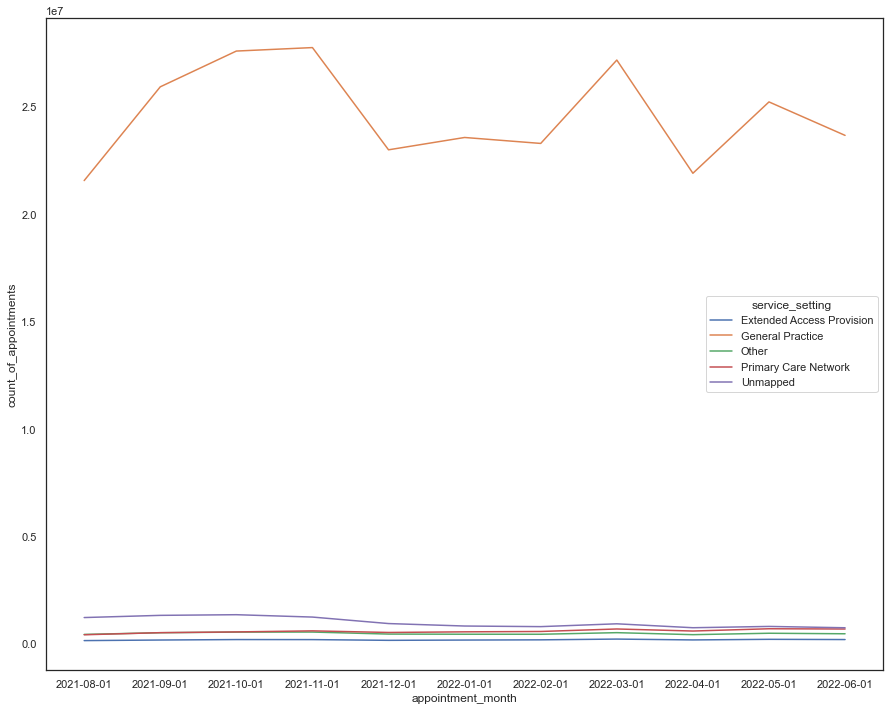

In [79]:
# Create lineplot for number of appointments by month and service setting.
sns.lineplot(data=apnts_by_month_and_setting,
             x='appointment_month',
             y='count_of_appointments',
             hue='service_setting',
             ci=None)

**Context types**

In [80]:
# Aggregate on monthly level and determine the sum of appointments per context type per month.
month_and_context_group = df_national_categories.groupby(['appointment_month', 'context_type'])
apnts_by_month_and_context = month_and_context_group['count_of_appointments'].sum().reset_index()

<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

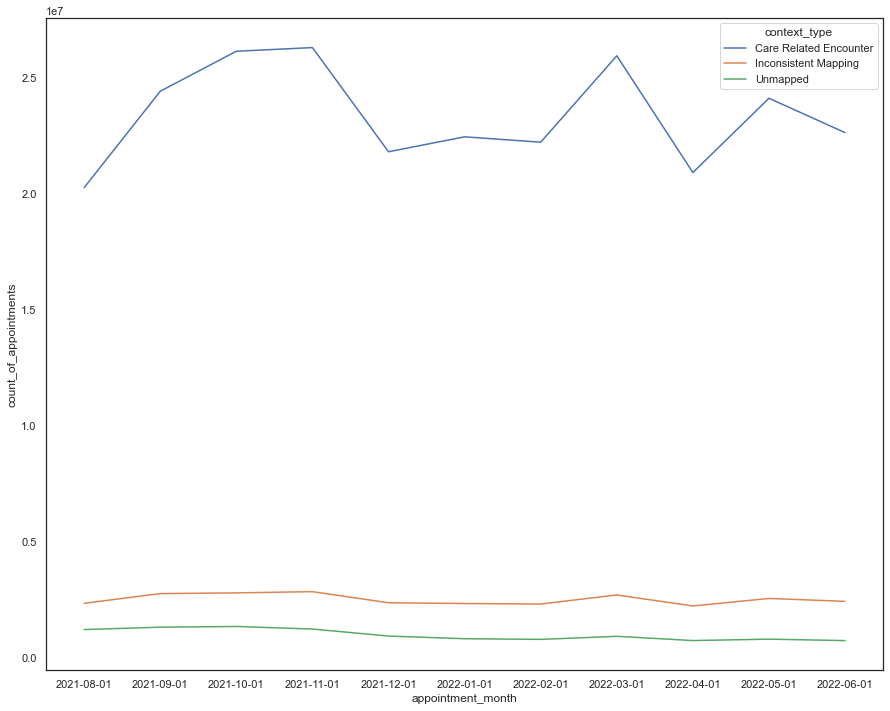

In [81]:
# Create lineplot for number of appointments by month and context type.
sns.lineplot(data=apnts_by_month_and_context,
             x='appointment_month',
             y='count_of_appointments',
             hue='context_type',
             ci=None)

**National categories**

In [82]:
# Aggregate on monthly level and determine the sum of appointments per national category per month.
month_and_category_group = df_national_categories.groupby(['appointment_month', 'national_category'])
apnts_by_month_and_category = month_and_category_group['count_of_appointments'].sum().reset_index()

<AxesSubplot:xlabel='appointment_month', ylabel='count_of_appointments'>

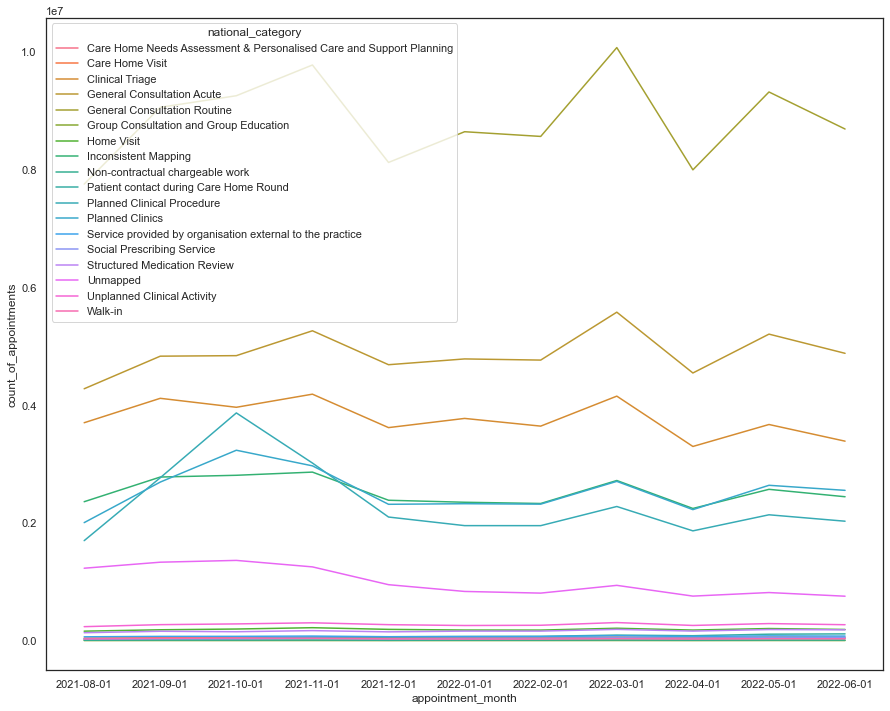

In [83]:
# Create lineplot for number of appointments by month and national category.
sns.lineplot(data=apnts_by_month_and_category,
             x='appointment_month',
             y='count_of_appointments',
             hue='national_category',
             ci=None)

### Objective 2
Create four visualisations indicating the number of appointments per service setting per season:
* Summer (August 2021)
* Autumn (October 2021)
* Winter (January 2022)
* Spring (April 2022)

**Approach**\
At a high level, the steps we will follow are similar to those for Objective 1 above:
1. We've already changed the data type for the column 'appointment_month' in df_national_categories from datetime to string.
2. Create a variable representing the DataFrameGroupBy object for appointments per month, setting, and date.
3. Use the DataFrameGroupBy object the data set for the visualisations.
4. Create each of the four filters: (1) August - summer, (2) October - autumn, (3) January - winter, and (4) April - spring.
5. Create each of the lineplots with Seaborn.

In [84]:
# Aggregate the appointments per month, date, and service setting.
date_and_setting_group = df_national_categories.groupby(['appointment_month', 'service_setting', 'appointment_date'])
apnts_by_date_and_setting = date_and_setting_group['count_of_appointments'].sum().reset_index()
apnts_by_date_and_setting

,appointment_month,service_setting,appointment_date,count_of_appointments
0,2021-08-01,Extended Access Provision,2021-08-01,438
1,2021-08-01,Extended Access Provision,2021-08-02,7705
2,2021-08-01,Extended Access Provision,2021-08-03,7820
3,2021-08-01,Extended Access Provision,2021-08-04,6917
4,2021-08-01,Extended Access Provision,2021-08-05,6841
...,...,...,...,...
1665,2022-06-01,Unmapped,2022-06-26,443
1666,2022-06-01,Unmapped,2022-06-27,40314
1667,2022-06-01,Unmapped,2022-06-28,37777
1668,2022-06-01,Unmapped,2022-06-29,35745


In [85]:
# Create August 2021 filter.
filt_aug = (apnts_by_date_and_setting['appointment_month'] == '2021-08-01')

In [86]:
# Create October 2021 filter.
filt_oct = (apnts_by_date_and_setting['appointment_month'] == '2021-10-01')

In [87]:
# Create January 2022 filter.
filt_jan = (apnts_by_date_and_setting['appointment_month'] == '2022-01-01')

In [88]:
# Create April 2022 filter.
filt_apr = (apnts_by_date_and_setting['appointment_month'] == '2022-04-01')

<AxesSubplot:xlabel='appointment_date', ylabel='count_of_appointments'>

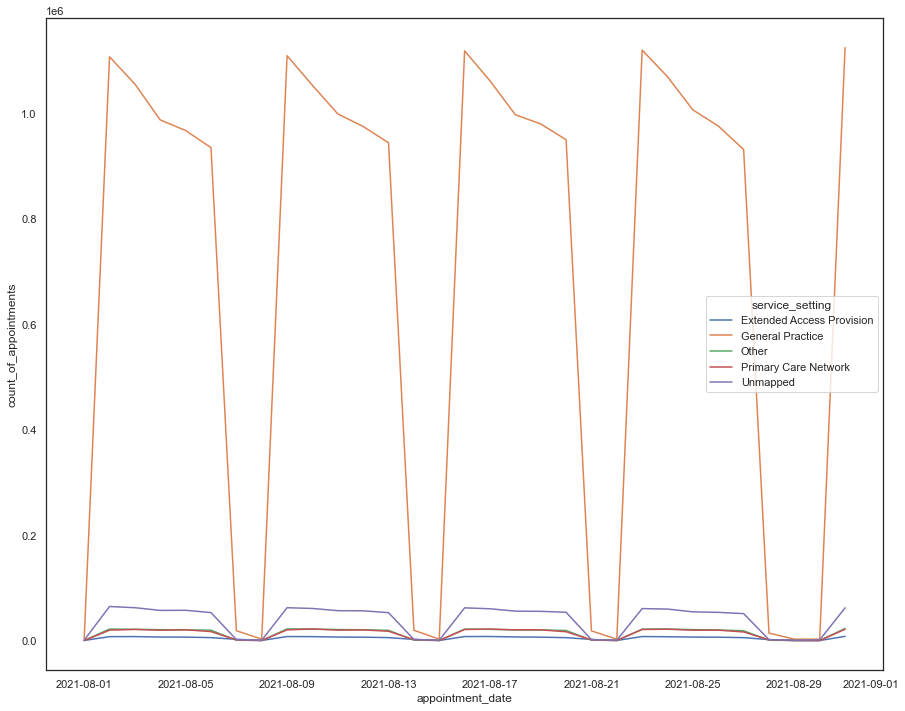

In [89]:
# Create lineplot summer 2021.
sns.lineplot(data=apnts_by_date_and_setting[filt_aug],
             x='appointment_date',
             y='count_of_appointments',
             hue='service_setting',
             ci=None)

<AxesSubplot:xlabel='appointment_date', ylabel='count_of_appointments'>

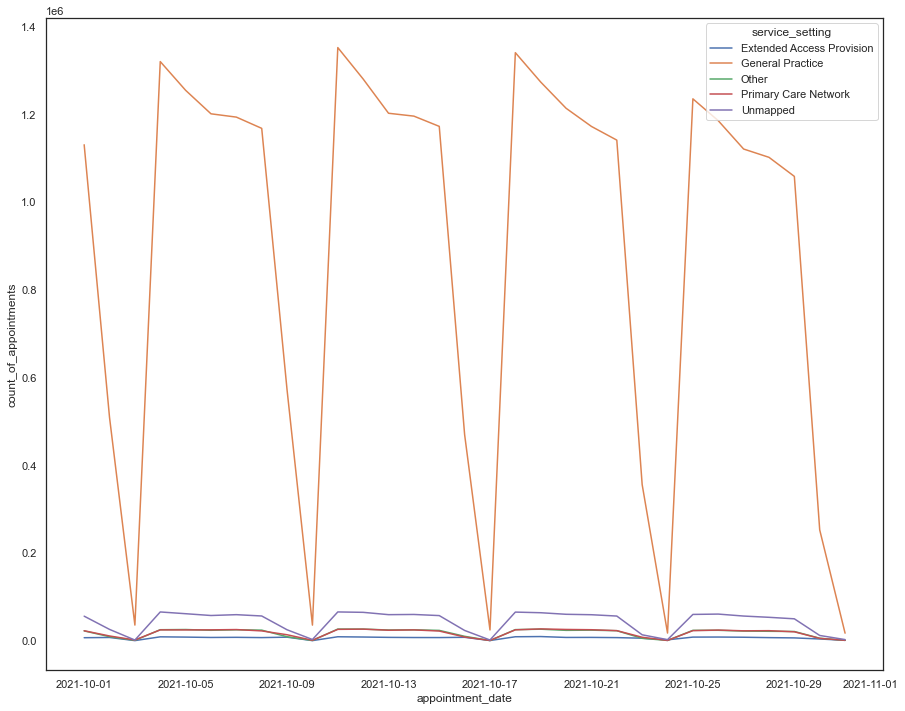

In [90]:
# Create lineplot autumn 2021.
sns.lineplot(data=apnts_by_date_and_setting[filt_oct],
             x='appointment_date',
             y='count_of_appointments',
             hue='service_setting',
             ci=None)

<AxesSubplot:xlabel='appointment_date', ylabel='count_of_appointments'>

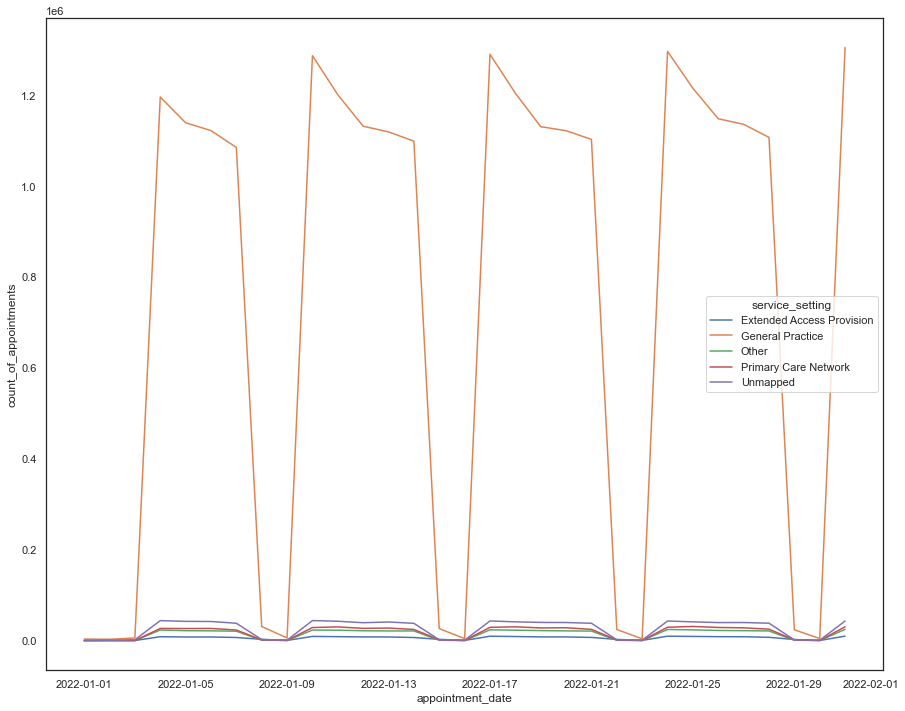

In [91]:
# Create lineplot winter 2021.
sns.lineplot(data=apnts_by_date_and_setting[filt_jan],
             x='appointment_date',
             y='count_of_appointments',
             hue='service_setting',
             ci=None)

<AxesSubplot:xlabel='appointment_date', ylabel='count_of_appointments'>

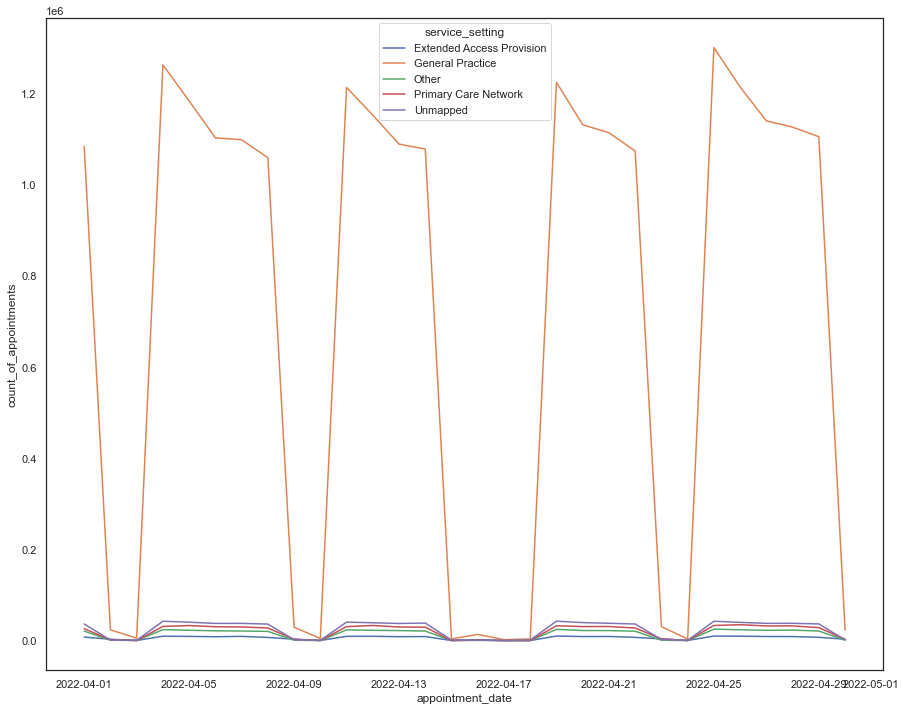

In [92]:
# Create lineplot spring 2022.
sns.lineplot(data=apnts_by_date_and_setting[filt_apr],
             x='appointment_date',
             y='count_of_appointments',
             hue='service_setting',
             ci=None)

# Activity 5

In [93]:
# Maximum column width to display.
pd.options.display.max_colwidth=200

In [94]:
# Create a DataFrame for 'tweets.csv'.
df_tweets = pd.read_csv('tweets.csv')

**Thoughts from seeing df_tweets below**
* df_tweets has ten columns including the tweet id, hashtags, count of retweets, and count of likes ('tweet_favorite_count).
* df_tweets has 1,174 rows, each representing a tweet.

In [95]:
# View the first five rows of df_tweets.
df_tweets.head(5)

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


In [96]:
# Explore df_tweets.
df_tweets.describe()

,tweet_id,tweet_retweet_count,tweet_favorite_count
count,1.174000e+03,1174.000000,1174.00000
mean,1.567612e+18,8.629472,0.37138
std,2.427553e+13,29.784675,2.04470
min,1.567574e+18,0.000000,0.00000
25%,1.567590e+18,0.000000,0.00000
50%,1.567611e+18,1.000000,0.00000
75%,1.567633e+18,3.000000,0.00000
max,1.567655e+18,303.000000,42.00000


In [97]:
# Explore df_tweets.
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


**What we see in the value_counts() output for 'tweet_retweet_count' and 'tweet_favorite_count'**\
The output for the 'tweet_retweet_count' column is a Series showing each of the unique values in the column 'tweet_retweet_count' as the index and how many rows in the DataFrame (i.e. how many tweets) had that value. For example, the first item in the output below shows there is one tweet in our DataFrame that has the value 303 in the 'tweet_retweet_count', the second item shows there are twelve tweets with the value 208, and scrolling down to the last item in the output, there are 526 tweets with the value 0.\
\
Similarly, the output for the 'tweet_favorite_count' column is a Series showing each of the unique values in the column 'tweet_favorite_count' as the index and how many rows in the DataFrame (i.e. how many tweets) had that value.\
\
It will be useful to look at these columns in more detail because they might represent the number of retweets and likes for each tweet which could be relevant to our understanding of missed NHS appointments (for example, if highly liked / retweeted tweet gives insgight relevant to our analysis).

In [98]:
# Explore the column 'tweet_retweet_count'.
df_tweets['tweet_retweet_count'].value_counts().sort_index(ascending=False).reset_index()

,index,tweet_retweet_count
0,303,1
1,208,12
2,207,3
3,169,1
4,150,4
5,107,1
6,85,3
7,79,1
8,78,2
9,76,3


In [99]:
# Explore the column 'tweet_favorite_count'.
df_tweets['tweet_favorite_count'].value_counts().sort_index(ascending=False).reset_index()

,index,tweet_favorite_count
0,42,1
1,28,1
2,20,1
3,18,1
4,17,1
5,14,1
6,13,1
7,12,1
8,11,1
9,10,1


In [100]:
# Create a new DataFrame with only text values.
df_tweets_text = df_tweets[['tweet_full_text']]
df_tweets_text.head(5)

,tweet_full_text
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be..."
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di..."


In [101]:
# Create a variable named 'tags' representing an empty list.
tags = []

In [102]:
# Split each tweet text in df_tweets_text into separate items based on the location of spaces
# and append items that contain '#' to the emplty list named tags.
for y in [x.split(' ') for x in df_tweets_text['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())

In [103]:
# Use the 'tags' list to create a Pandas Series and display the first 30 records.
tags = pd.Series(tags)
tags.head(30)

0                                    #healthcare
1                                 #premisehealth
2                                        #hiring
3                                    #healthcare
4                                        🚨#new:🚨
5                                look!\n\n#blogs
6                         #digitaltransformation
7                                 #cybersecurity
8                                    #accounting
9                                       #finance
10                                   #healthcare
11    https://t.co/jrgqeqdme4\n.\n#firstcoastcna
12                                      #cnaexam
13                           #cnaexampreparation
14                                 #jacksonville
15                                  #cnatraining
16                                        #nurse
17                                      #nursing
18                                    #nurselife
19                            #nursepractitioner
20                  

In [104]:
# Count number of times each hashtag is in the Series tags.
tags = tags.value_counts()
tags

#healthcare      716
#health           80
#medicine         41
#ai               40
#job              38
                ... 
#evestudy          1
#patientdata…      1
#secure            1
#sms               1
\n#csjmu           1
Length: 1754, dtype: int64

In [105]:
# Convert the Series tags to a DataFrame.
df_data = pd.DataFrame(tags).reset_index()
df_data.head()

,index,0
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38


In [106]:
# Change columns names in df_data.
df_data.columns = ['word', 'count']
df_data.head()

,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38


In [107]:
# Check the data type for column 'count' is integer.
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754 entries, 0 to 1753
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    1754 non-null   object
 1   count   1754 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 27.5+ KB


<AxesSubplot:xlabel='count', ylabel='word'>

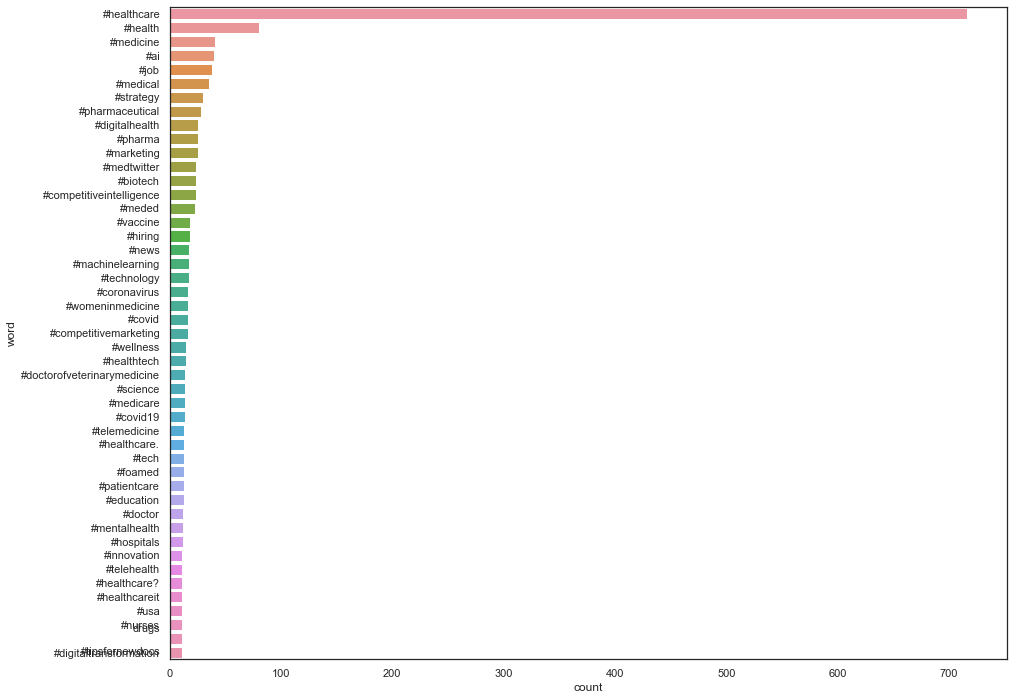

In [108]:
# Create a Seaborn barplot for all records with count > 10.
# Create filter for 'count' > 10.
filt_tweets = (df_data['count'] > 10)
df_data_over_ten = df_data[filt_tweets]
sns.barplot(data=df_data_over_ten, x='count', y='word')

In [109]:
df_data_over_ten

,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
5,#medical,35
6,#strategy,30
7,#pharmaceutical,28
8,#digitalhealth,25
9,#pharma,25
